# Tutorial 5 - Python For Data Analysis 🐍 

---

## Scikit Learn 💫

In [1]:
#optuna, huggingface, xgboost

### *Table of Contents*

- Supervised Learning 🔎
  - [Exercise 1](#exercise-1) 
  - [Exercice 2](#exercise-2) 

## Requirements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

# Regression models
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor,ElasticNet,Ridge,LinearRegression,Lasso

# Classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


## Supervised Learning

### Exercice 1
---

#### 1) Load and return the boston dataset from sklearn.datasets

In [3]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

#### 2) Split the boston dataset into train data and test data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 3) Standardize the data.

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 4) Train or fit the data into a model using the Support Vector Machine Learning algorithm and test it.

In [6]:
model = SVR()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5543454037359111

#### 5) Select the best hyperparameters of the model using GridSearch.

In [7]:
parameters = {'C':[1, 10, 100],
              'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 
              'gamma':('scale','auto'),
              'degree':np.arange(1,10)
              }

clf = GridSearchCV(estimator=SVR(),
                  param_grid=parameters)

clf.fit(X_train, y_train)
print(clf.best_params_,
      clf.best_score_)
clf.score(X_test, y_test)

{'C': 100, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'} 0.8415871621688493


0.8191908769421343

#### 6) Create a function to test the different hyperparameters.

In [8]:
def hyperparam_tuning(X_train, y_train, X_test, y_test, models_name, models, parameters_dict):
    perf = dict()
    with tqdm(total=len(models)) as bar:
        for name, model, parameters in zip(model_names, models, parameters_dict):
            clf = GridSearchCV(estimator=model,
                              param_grid=parameters)
            clf.fit(X_train, y_train)
            perf[name] = {"best_scores": clf.best_score_,
                          "best_params": clf.best_params_,
                          "test_score": clf.score(X_test, y_test)}
            bar.update(1)
    return perf

#### 7) Train or fit the data using other algorithms.

In [9]:
model_names = ["SGDRegressor", "ElasticNet", "Ridge", "LinearRegression", "Lasso","svr"]
models = [SGDRegressor(), ElasticNet(), Ridge(), LinearRegression(), Lasso(),SVR()]

for name,model in zip(model_names,models):
    model.fit(X_train, y_train)
    print(name,":",model.score(X_test, y_test))

SGDRegressor : 0.6663566491366639
ElasticNet : 0.5810435065985062
Ridge : 0.6727737684528232
LinearRegression : 0.6733825506400195
Lasso : 0.5999442961470398
svr : 0.5543454037359111


#### 8) Compare the performance of the different algorithms. Which is the best Model ?

In [12]:
model_names = ["SGDRegressor", "ElasticNet", "Ridge", "LinearRegression", "Lasso","svr"]
models = [SGDRegressor(), ElasticNet(), Ridge(), LinearRegression(), Lasso(),SVR()]
parameters_dict = [{'loss':('huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'),
                  'penalty':('l2', 'l1', 'elasticnet')
                  },
                  {'l1_ratio':np.arange(0,1.1,0.1), 
                  'selection':('cyclic', 'random')
                  },
                  {'solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs')
                  },
                  {
                  },
                  {'alpha':np.arange(0.1,2,0.1)
                  },
                  {'C':[1, 10, 100],
                  'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 
                  'gamma':('scale','auto'),
                  'degree':np.arange(1,10)
                  }]


perf = hyperparam_tuning(X_train, y_train, X_test, y_test, model_names, models, parameters_dict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to

In [13]:
perf

{'SGDRegressor': {'best_scores': 0.7176132856900247,
  'best_params': {'loss': 'epsilon_insensitive', 'penalty': 'l2'},
  'test_score': 0.6175049168349676},
 'ElasticNet': {'best_scores': 0.6774284745995518,
  'best_params': {'l1_ratio': 1.0, 'selection': 'cyclic'},
  'test_score': 0.5999442961470398},
 'Ridge': {'best_scores': 0.7193287369531853,
  'best_params': {'solver': 'saga'},
  'test_score': 0.6726315392399356},
 'LinearRegression': {'best_scores': 0.7183293974315904,
  'best_params': {},
  'test_score': 0.6733825506400195},
 'Lasso': {'best_scores': 0.7165080728306277,
  'best_params': {'alpha': 0.1},
  'test_score': 0.6599647116559877},
 'svr': {'best_scores': 0.8415871621688493,
  'best_params': {'C': 100, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'},
  'test_score': 0.8191908769421343}}

SVM is the best model.

### Exercice 2
---

#### 1) Load and return the dataset titanic from seaborn library.

In [17]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### 2) Use different machine learning models to predict the survival of titanic passengers.

Type of Machine Learning: Supervised Learning  
Type of problem: Classification

In [18]:
print("Percentage of nan value for each column of the dataset")
100*titanic.isnull().sum(axis=0)/titanic.shape[0]

Percentage of nan value for each column of the dataset


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

Text(0.5, 1.0, 'Missing values heatmap')

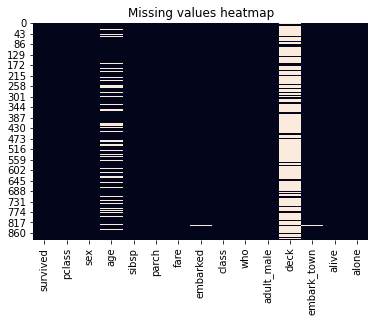

In [19]:
sns.heatmap(titanic.isnull(), cbar = False).set_title("Missing values heatmap")

In [20]:
X = titanic.drop("survived", axis=1)
y = titanic["survived"]

Selected features
- Qualitative:
  - **pclass**
  - **age** 
  - **sibsp** 
  - **parch** 
  - **fare** 
  - **alone**
  - **adult_male** 
- Quantitative:
  - **embarked** 
  
Not selected features:  
- class: same as pclass
- adult_male: same as sex
- deck: too much nan values
- embark_town: irrelevant
- alive: irrelevant
- who: same as sex


In [21]:
X = X.loc[:,["pclass", 
             "age",
             "sibsp",
             "parch",
             "fare",
             "alone",
             "adult_male",
             "embarked"]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### Imputer

In [23]:
simple_imputer_cat = SimpleImputer(strategy="most_frequent")
simple_imputer = SimpleImputer(strategy="mean")

In [24]:
X_train.loc[:,"age"] = simple_imputer.fit_transform(X_train.age.values.reshape(-1,1))
X_test.loc[:,"age"] = simple_imputer.transform(X_test.age.values.reshape(-1,1))

X_train.loc[:,"embarked"] = simple_imputer_cat.fit_transform(X_train.embarked.values.reshape(-1,1)).reshape(-1)
X_test.loc[:,"embarked"] = simple_imputer_cat.transform(X_test.embarked.values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

##### Scaling

In [25]:
scaler = StandardScaler()

In [26]:
X_train.loc[:,["age","fare"]] = scaler.fit_transform(X_train[["age","fare"]])
X_test.loc[:,["age","fare"]] = scaler.transform(X_test[["age","fare"]])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


##### Encoding

In [27]:
X_train.loc[:,"alone"] = X_train["alone"].astype(int)
X_test.loc[:,"alone"] = X_test["alone"].astype(int)

X_train.loc[:,"adult_male"] = X_train["adult_male"].astype(int)
X_test.loc[:,"adult_male"] = X_test["adult_male"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


###### One Hot

In [28]:
#one_hot_encoder = OneHotEncoder()

In [29]:
"""X_train[X_train.embarked.unique()] = one_hot_encoder.fit_transform(X_train.embarked.values.reshape(-1,1)).toarray()
X_test[X_train.embarked.unique()] = one_hot_encoder.transform(X_test.embarked.values.reshape(-1,1)).toarray()

X_train.drop("embarked",axis=1,inplace=True)
X_test.drop("embarked",axis=1,inplace=True)"""

'X_train[X_train.embarked.unique()] = one_hot_encoder.fit_transform(X_train.embarked.values.reshape(-1,1)).toarray()\nX_test[X_train.embarked.unique()] = one_hot_encoder.transform(X_test.embarked.values.reshape(-1,1)).toarray()\n\nX_train.drop("embarked",axis=1,inplace=True)\nX_test.drop("embarked",axis=1,inplace=True)'

###### Label

In [30]:
label_encoder = LabelEncoder()

In [31]:
X_train.loc[:,"embarked"] = label_encoder.fit_transform(X_train.embarked.values)
X_test.loc[:,"embarked"] = label_encoder.transform(X_test.embarked.values)

In [32]:
X_train

,pclass,age,sibsp,parch,fare,alone,adult_male,embarked
857,1,1.620744,0,0,-0.122530,1,1,2
52,1,1.467007,1,0,0.918124,0,0,0
386,3,-2.222675,5,2,0.299503,0,0,2
124,1,1.851349,0,1,0.929702,0,1,2
578,3,0.000000,1,0,-0.373297,0,0,0
...,...,...,...,...,...,...,...,...
835,1,0.698323,1,1,1.051455,0,0,0
192,3,-0.839044,1,0,-0.510258,0,0,2
629,3,0.000000,0,0,-0.512765,1,1,1
559,3,0.467718,1,0,-0.312290,0,0,2


Models

In [33]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier"]
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier()]

for name,model in zip(model_names,models):
    model.fit(X_train, y_train)
    print(name,":",model.score(X_test, y_test))

LogisticRegression : 0.8208955223880597
SVC : 0.8097014925373134
KNeighborsClassifier : 0.7761194029850746
DecisionTreeClassifier : 0.7761194029850746
RandomForestClassifier : 0.8097014925373134
BaggingClassifier : 0.8022388059701493
GradientBoostingClassifier : 0.8208955223880597
SGDClassifier : 0.7947761194029851


In [34]:
def hyperparam_tuning(X_train, y_train, X_test, y_test, models_name, models, parameters_dict):
    perf = dict()
    with tqdm(total=len(models)) as bar:
        for name, model, parameters in zip(model_names, models, parameters_dict):
            print(name)
            clf = GridSearchCV(estimator=model,
                              param_grid=parameters)
            clf.fit(X_train, y_train)
            perf[name] = {"best_scores": clf.best_score_,
                          "best_params": clf.best_params_,
                          "test_score": clf.score(X_test, y_test)}
            bar.update(1)
    return perf

In [35]:
parameters_dict = [{'C':[10, 100],
                  'penalty':('l2', 'l1', 'elasticnet')
                  },
                  {'C':[1, 10, 100],
                   'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
                  },
                  {'n_neighbors':np.arange(2,20),
                  'p':np.arange(1,4),
                  'weights':('uniform','distance')
                  },
                  {
                  },
                  {'n_estimators':np.arange(50,250,10)
                  },
                  {'n_estimators':np.arange(10,1000,80)
                  },
                  {'loss':('deviance', 'exponential'),
                   'learning_rate':np.arange(0.01,1,0.01)
                  },
                  {'penalty':('l2', 'l1', 'elasticnet')
                  }]

In [36]:
perf = hyperparam_tuning(X_train, y_train, X_test, y_test, model_names, models, parameters_dict)

LogisticRegression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

SVC
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
BaggingClassifier
GradientBoostingClassifier
SGDClassifier



#### 3) Which is the best model?

In [37]:
perf

{'LogisticRegression': {'best_scores': 0.8218838709677418,
  'best_params': {'C': 10, 'penalty': 'l2'},
  'test_score': 0.8208955223880597},
 'SVC': {'best_scores': 0.8283096774193549,
  'best_params': {'C': 1, 'kernel': 'rbf'},
  'test_score': 0.8097014925373134},
 'KNeighborsClassifier': {'best_scores': 0.816941935483871,
  'best_params': {'n_neighbors': 16, 'p': 1, 'weights': 'uniform'},
  'test_score': 0.8208955223880597},
 'DecisionTreeClassifier': {'best_scores': 0.7624645161290322,
  'best_params': {},
  'test_score': 0.7835820895522388},
 'RandomForestClassifier': {'best_scores': 0.7913548387096775,
  'best_params': {'n_estimators': 180},
  'test_score': 0.8059701492537313},
 'BaggingClassifier': {'best_scores': 0.8009677419354839,
  'best_params': {'n_estimators': 650},
  'test_score': 0.8022388059701493},
 'GradientBoostingClassifier': {'best_scores': 0.8443483870967741,
  'best_params': {'learning_rate': 0.03, 'loss': 'deviance'},
  'test_score': 0.8171641791044776},
 'SGDCl

The best model are KNeighborsClassifier and LogisticRegression.